In [1]:
# Importing Packages
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [2]:
#Compute the time-derivative of a Lorenz system
def x_dot(x1, y1, z1, x2, y2, z2, t,alp):
    x1_dot=sigma*(y1 - x1)+alp*(x2-x1)
    x2_dot=sigma*(y2 - x2)+alp*(x1-x2)
    return(x1_dot,x2_dot)

def y_dot(x1, y1, z1, x2, y2, z2, t,alp):
    y1_dot=rho*x1 - y1 - x1*z1
    y2_dot=rho*x2 - y2 - x2*z2
    return(y1_dot,y2_dot)

def z_dot(x1, y1, z1, x2, y2, z2, t,alp):
    z1_dot=-1*(beta*z1) + x1*y1
    z2_dot=-1*(beta*z2) + x2*y2
    return(z1_dot,z2_dot)

In [3]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,a2,b2,c2,alp,n):
    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    x2[0] = a2
    y2[0] = b2
    z2[0] = c2
    t[0] = 0
    dt = 0.01

    # Compute the approximate solution at equally spaced times.
    for k in tqdm(range(n-1)):

        t[k+1] = t[k] + dt

        k1,u1 = x_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)
        l1,v1 = y_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)
        m1,w1 = z_dot(x1[k], y1[k], z1[k],x2[k], y2[k], z2[k], t[k],alp)

        k2,u2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt),
         (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt),
          (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt),
         (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt),
          (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt),
         (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt),
          (z2[k] + 0.5*w1*dt), (t[k] + dt/2),alp)

        k3,u3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt),
         (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt),
          (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt),
         (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt),
          (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt),
         (z1[k] + 0.5*m2*dt),(x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt),
          (z2[k] + 0.5*w2*dt), (t[k] + dt/2),alp)

        k4,u4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt), (t[k] + dt),alp)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,x2,y2,z2,t


In [4]:
#Synchronization error function
def eAlpha(tmp,a,N):
  tmp1,tmp2,tmp3=0,0,0
  x_1, y_1, z_1, x_2, y_2, z_2, t=[],[],[],[],[],[],[]
  x_1, y_1, z_1, x_2, y_2, z_2, t = RungeKutta4(tmp[0],tmp[1],tmp[2],
                                                tmp[3],tmp[4],tmp[5],a,N)

  e=sum(np.sqrt(pow((x1 - x2),2) +pow((y1 - y2),2) +pow((z1 - z2),2) )
  for x1, x2,y1,y2,z1,z2 in zip(x_1, x_2,y_1,y_2,z_1,z_2)) #total_absolute_difference
  return e

In [5]:
from joblib import Parallel, delayed

In [6]:
# Initial conditions and function call
sigma = 10.0
beta = 8.0/3.0
rho = 28.0
E = {}
N=int(2000/0.01)
for i in tqdm(range(0,1)):
    tmp=random.sample(range(-20,30), 6)
    E[i] = []

    results = Parallel(n_jobs=12)(delayed(eAlpha)(tmp,a,N)
                                  for a in np.arange(3,4.5,0.06))
    E[i].extend(results)

A=pd.DataFrame(E)
E_new=A.sum(axis=1)
k=len(E.keys())

  0%|          | 0/1 [00:00<?, ?it/s]

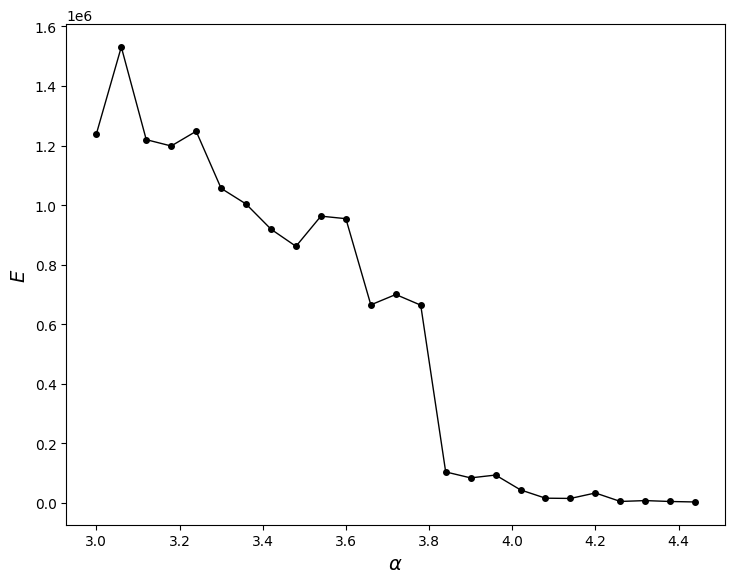

In [7]:
#Plot
plt.figure (figsize = (8.5,6.5))
plt.plot(np.arange(3,4.5,0.06),E_new/k, linewidth = 1,
         color = 'black',marker='o', markersize=4)
plt.xlabel(r"$\alpha$",fontsize=14)
plt.ylabel(r"$E$",fontsize=14)
plt.savefig('Img1.pdf', format='pdf')
plt.show()

In [8]:
#A.to_csv('A_for_E_new.csv', index=False)

In [9]:
#d=pd.read_csv("/content/sample_data.csv")